In [5]:
import os
import datetime

def printbar():
    nowtime = datetime.datetime.now().strftime('%Y-%m%d %H:%M%S')
    print(f'\n======================================={nowtime}')

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" 

In [6]:
import torch
import torchkeras


In [7]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, TensorDataset

dftrain_raw = pd.read_csv('/data/snlp/zhangjl/datas/ctr/eat_pytorch_datasets/titanic/train.csv')
dftest_raw = pd.read_csv('/data/snlp/zhangjl/datas/ctr/eat_pytorch_datasets/titanic/test.csv')

dftrain_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
1,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
2,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
4,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S


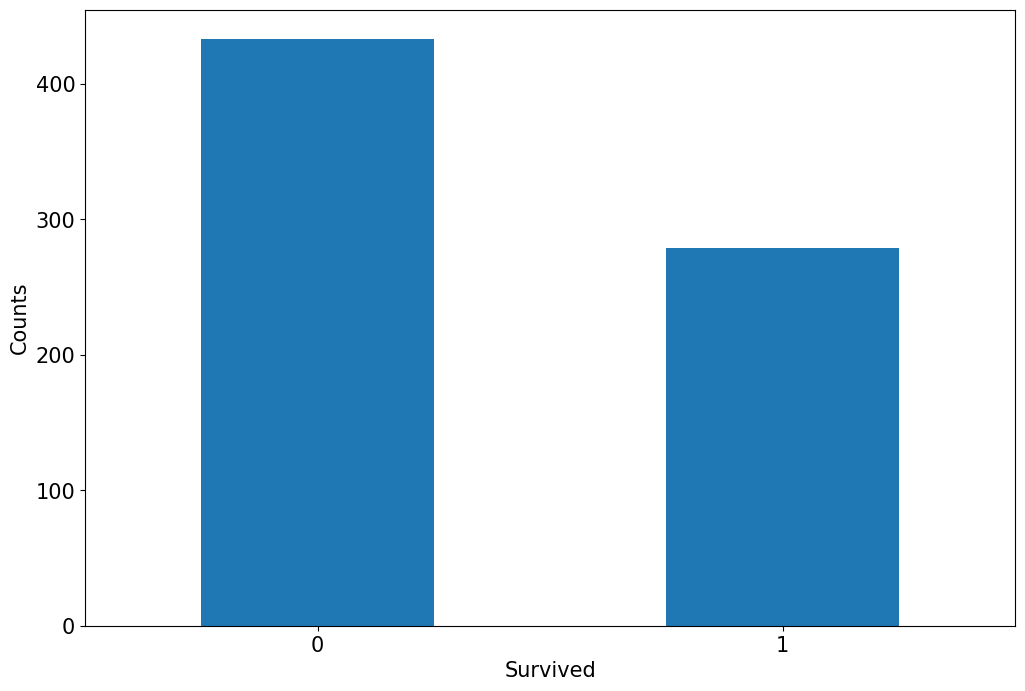

In [8]:
import matplotlib.pyplot as plt
ax = dftrain_raw['Survived'].value_counts().plot(kind='bar', figsize=(12, 8), fontsize=15, rot=0)
ax.set_ylabel('Counts', fontsize=15)
ax.set_xlabel('Survived', fontsize=15)
plt.show()

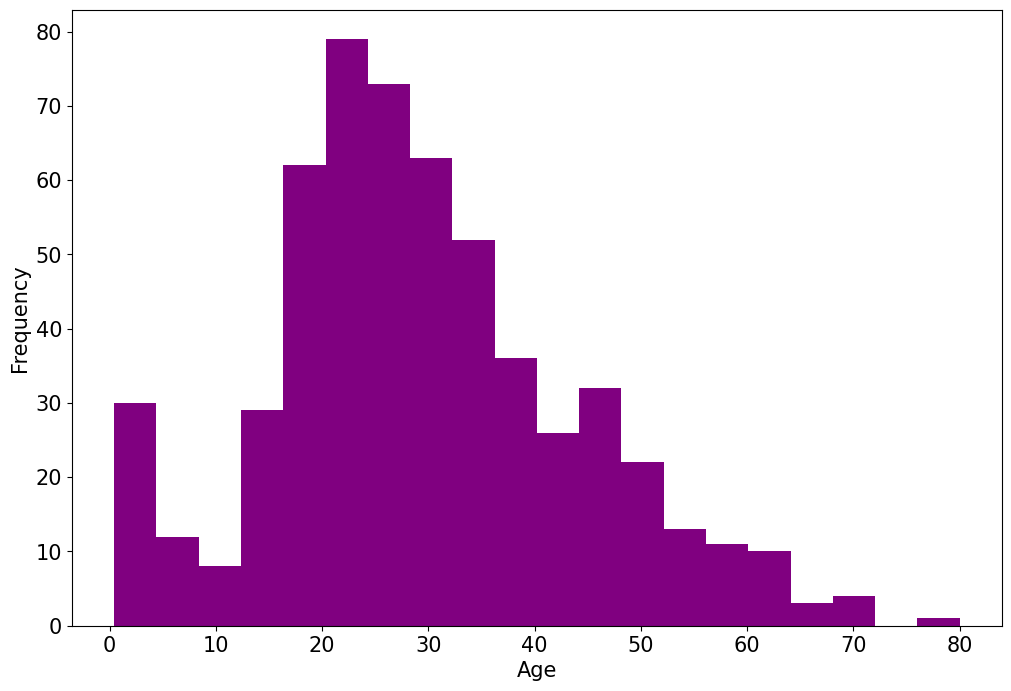

In [9]:
ax = dftrain_raw['Age'].plot(kind = 'hist',bins = 20,color= 'purple',
                    figsize = (12,8),fontsize=15)

ax.set_ylabel('Frequency',fontsize = 15)
ax.set_xlabel('Age',fontsize = 15)
plt.show()

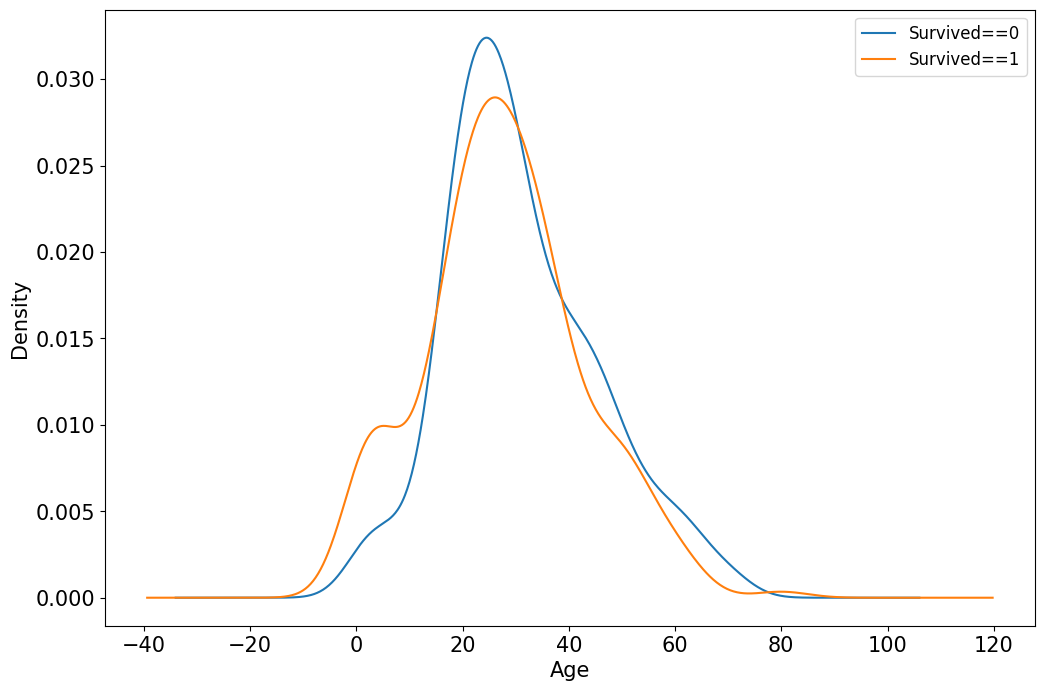

In [10]:
ax = dftrain_raw.query('Survived == 0')['Age'].plot(kind = 'density',
                      figsize = (12,8),fontsize=15)
dftrain_raw.query('Survived == 1')['Age'].plot(kind = 'density',
                      figsize = (12,8),fontsize=15)
ax.legend(['Survived==0','Survived==1'],fontsize = 12)
ax.set_ylabel('Density',fontsize = 15)
ax.set_xlabel('Age',fontsize = 15)
plt.show()

In [27]:
def preprocessing(dfdata):

    dfresult= pd.DataFrame()

    #Pclass
    dfPclass = pd.get_dummies(dfdata['Pclass'])
    dfPclass.columns = ['Pclass_' +str(x) for x in dfPclass.columns ]
    dfresult = pd.concat([dfresult,dfPclass],axis = 1)

    #Sex
    dfSex = pd.get_dummies(dfdata['Sex'])
    dfresult = pd.concat([dfresult,dfSex],axis = 1)

    #Age
    dfresult['Age'] = dfdata['Age'].fillna(0)
    dfresult['Age_null'] = pd.isna(dfdata['Age']).astype('int32')

    #SibSp,Parch,Fare
    dfresult['SibSp'] = dfdata['SibSp']
    dfresult['Parch'] = dfdata['Parch']
    dfresult['Fare'] = dfdata['Fare']

    #Carbin
    dfresult['Cabin_null'] =  pd.isna(dfdata['Cabin']).astype('int32')

    #Embarked
    dfEmbarked = pd.get_dummies(dfdata['Embarked'],dummy_na=True)
    dfEmbarked.columns = ['Embarked_' + str(x) for x in dfEmbarked.columns]
    dfresult = pd.concat([dfresult,dfEmbarked],axis = 1)

    return(dfresult)

In [39]:
x_train = preprocessing(dftrain_raw)
y_train = dftrain_raw[['Survived']]

x_test = preprocessing(dftest_raw)
y_test = dftest_raw[['Survived']]

print("x_train.shape =", x_train.shape )
print("x_test.shape =", x_test.shape )
print(x_train)

print("y_train.shape =", y_train.shape )
print("y_test.shape =", y_test.shape )

x_train.shape = (712, 15)
x_test.shape = (179, 15)
     Pclass_1  Pclass_2  Pclass_3  female   male   Age  Age_null  SibSp  \
0        True     False     False   False   True  55.0         0      0   
1        True     False     False    True  False  49.0         0      1   
2       False      True     False    True  False  36.0         0      0   
3       False      True     False   False   True  19.0         0      0   
4       False     False      True   False   True  14.0         0      4   
..        ...       ...       ...     ...    ...   ...       ...    ...   
707     False     False      True    True  False  24.0         0      0   
708      True     False     False   False   True   0.0         1      0   
709     False     False      True   False   True  45.0         0      0   
710     False      True     False   False   True  35.0         0      0   
711      True     False     False   False   True   0.0         1      0   

     Parch     Fare  Cabin_null  Embarked_C  Emb

In [43]:
dl_train = DataLoader(TensorDataset(torch.tensor(x_train.values), torch.tensor(y_train.values)),
                     shuffle = True, batch_size = 8)


TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

In [44]:
def create_net():
    net = nn.Sequential()
    net.add_module('linear1', nn.Linear(15, 20))
    net.add_module('relu1', nn.ReLU())
    net.add_module('linear2', nn.Linear(20, 15))
    net.add_module('relu2', nn.ReLU())
    net.add_module('linear3', nn.Linear(15, 1))
    return net

net = create_net()
print(net)

Sequential(
  (linear1): Linear(in_features=15, out_features=20, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=20, out_features=15, bias=True)
  (relu2): ReLU()
  (linear3): Linear(in_features=15, out_features=1, bias=True)
)


In [ ]:
from torchkeras.metrics import Accuracy
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
metrics_dict = {'acc': Accuracy()}